<a id='new'></a>

# Seattle's first speed dial number : 911 !!!!

This case study focuses on a bunch of phone calls to **"911"**initiated in Seattle city for various reasons. The title of this jupyter notebook is intended to mock the reason for which the residents call **"911"**. The reasons are as follows : 

1. Latte Spills - hot latte spills all over their lap (ouch!),

2. Beavers Accident - Beavers attack unsuspecting passersbys (watch out for those beavers!), 

3. Seal attacks - Seal attacks (Okay, acceptable), and 

4. Marshawn Lynch sightings (MLS)  = (people get very excited and choose to call 911 for some reason). 

1. [Package Imports](#package)
2. [Data Import](#import)
3. [Question 1: EDA](#q1)
4. [Question 2: Graphical Representation](#q2)
5. [Question 3: Modelling](#q3)

  5.1 [3A: Explanation](#describe)
    
  5.2 [3B: Euclidean problem](#problem)
    
  5.3 [3C: Code](#algo)
      
     5.3.1 [First Approach](#first2)
      
     5.3.2 [Second Approach](#second2)
    
    5.4 [3D: Correct Categorization](#correct)
    
    5.5 [3E: Insights](#insights)
6. [Extra Work](#extra)

<a id='package'></a>

### Package imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [25]:
# !python -m pip install --upgrade pip setuptools wheel

<a id='import'></a>

### Data Import 

In [26]:
data = pd.read_excel("rev data for test.xlsx")


In [27]:
data.head()

,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [28]:
data.shape

(1514, 4)

<a id='q1'></a>

### Q1 

[Back to index](#new)

<a id='q1a'></a>

#### Q1.A What is the most common reason for calling 911?

In [29]:
reasons = data.Type.value_counts()
reasons

Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Type, dtype: int64

The highest number of calls to 911 are due to the **"Beaver Accident"**. Below is the graphical representation of it - 


<a id='q1b'></a>

#### Q1.B Graphical representation

In [30]:
# reasons.values

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


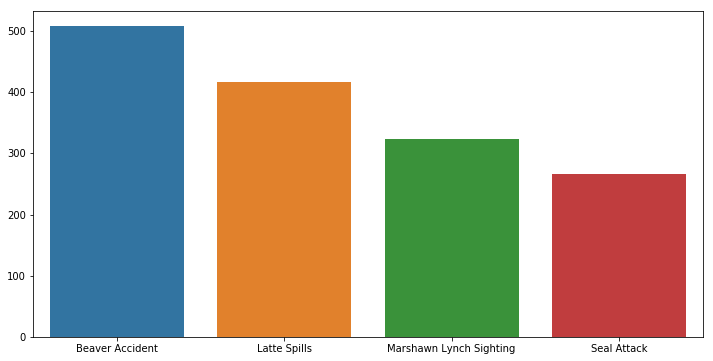

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(reasons.index, reasons.values);

<a id='q2'></a>

### Q2 

[Back to index](#new)

<a id='graph'></a>

#### Q2.A Please create a graph of the 911 calls using the 'Latitude' and 'Longitude' (graph type is up to you) (differentiate call type using colors)

For us to plot the latitudes and longitudes, we are gonna lay a basemap of the city of Seattle which I have downloaded from the internet. This will give us a better idea. Let us do that. The following plot is the shape file of Seattle roads. 

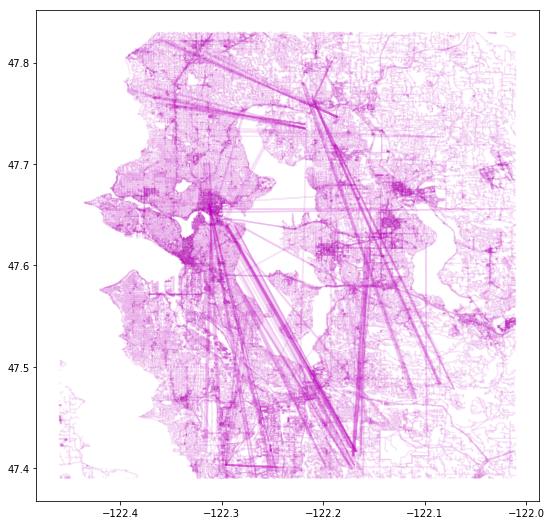

In [32]:
fig , ax = plt.subplots(figsize=(9,12))

roadmap = gpd.read_file("seattle/Seattle-shp/shape/roads.shp")
roadmap.plot(color='m', alpha = 0.1, ax=ax,  markersize = 1.5)


Let us divide the dataset into 4 parts as per the reason for the 911 calls. 


In [33]:
types = data.Type.unique()
types

array(['Beaver Accident', 'Seal Attack', 'Latte Spills',
       'Marshawn Lynch Sighting'], dtype=object)

In [34]:
data.rename({"Report Location": "Location"}, inplace=True, axis=1)
data.head()

,Type,Latitude,Longitude,Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [35]:
## the point format of geopandas comes is really handy to plot the data points
Location = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
data["Loc"] = Location

In [36]:
# we wont be needing the original location provided in the dataset now. so drop
data.drop( ["Location"], axis = 1, inplace = True)

In [37]:
# for us to plot data points using geopandas, a geopandas DataFrame needs to formed. 
crs = {'init': 'epsg:4326'}
data_loc = gpd.GeoDataFrame(data, crs=crs, geometry=Location)

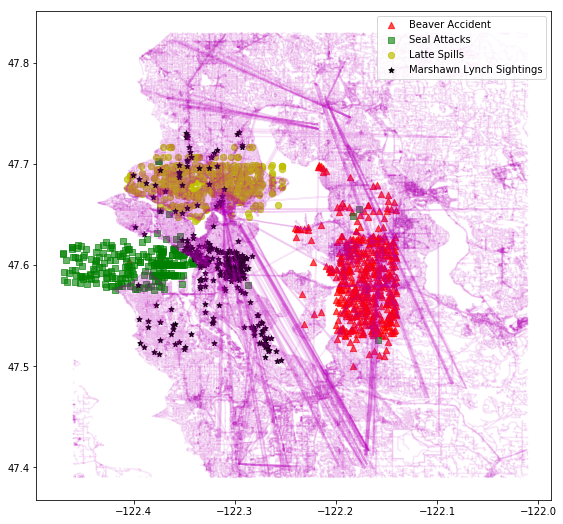

In [38]:
# plot the data points
fig, ax = plt.subplots(figsize = (16,9))

# laying the base map of Seattle
roadmap = gpd.read_file("seattle/Seattle-shp/shape/roads.shp")
roadmap.plot(color='m', alpha = 0.1,ax =ax, markersize = 1.5)

data_loc[data.Type == types[0]].geometry.plot(marker='^', color = 'r', ax= ax,label = 'Beaver Accident', alpha=.7, markersize = 40 )
data_loc[data.Type == types[1]].geometry.plot(marker='s', color = 'g', ax= ax,label = 'Seal Attacks', alpha=.6, markersize = 40)
data_loc[data.Type == types[2]].geometry.plot(marker='o', color = 'y', ax= ax,label = 'Latte Spills', alpha=.7,markersize = 40)
data_loc[data.Type == types[3]].geometry.plot(marker='*', color = 'k', ax= ax,label = 'Marshawn Lynch Sightings', alpha=1, markersize = 30 )

plt.legend(loc = "best")

<a id='mislabelled'></a>

#### Q2.B Are there any data points that look mislabeled?

As far as this map is concerned, we see that there can we two mislaballed classes - 

1. Type of calls which include  **"Marhsawn Lynch Sighting"** are pretty much scattered all around the downtown of Seattle as well in the outskirts like **"University of Washington"** on North side and **"Renton"** on the South side. 

2. We see that **"Seal Attacks"** also have some of the outliers towards to Bellevue side of Seattle. 

<a id='q3'></a>

### Q3 

[Back to index](#new)

<a id='describe'></a>

#### Q3.A If we were to use only 'Latitude' and 'Longitude', could we make an intelligent decision as to why a resident dialed 911? (In other words, if we take off the labels - can we still determine which category a 911 call would most likely fall into?) Please describe this algorithm and your reason for choosing it.

### Approaches for algorithms to solve the problem 

As we know that this seems like a classic clustering problem where the data points can be divided into the respective clusters with the use of appropriate distance measuring technique. 

As rightly questioned in the Question 3.B and as given in the dataset, we have the latitude and longitude of the 911 calls which really cannot be used a flat-geometry points. 

Therfore, I am going to use two approaches here. 

<a id='first1'></a>

##### First Approach 

The first approach is **"Heirarchichal Clustering"**. We are dealing with non-Euclidean data points here and that is why heirarchichal should be a good aproach. It builds nested clusters by merging or splitting them successively, thereby forming dendogram trees. The **Agglomerative Clustering** performs heirarchichal clustering using a bottom-up approach - each observation starts in its own cluster, and clusters are successively merged together. 

According to my research the linkage criteria to be used is "average" - minimizes the average of the distances between all observations of pairs of clusters. 

<a id='second1'></a>

##### Second Approach 

If we **do not** consider this Seattle map to be a flat surface, then our data points won't be linear. Agglomerative still **Euclidean distance** for its metric calculation uses "minimum variance" principle to cluster and not the geodetic distance.

Therefore, the second approach is **"Random Forest"**. The reason I am using Random Forests (an ensemble of Decision Trees) is that it takes in the positions of the data points and not the computation of distances like Euclidean in K-Means or Agglomerative. This means that whatever the location of the data point may be, the **relative spatial represenatation** is what matters the most in Random Forest. 

Also, Random Forest is like a basic go-to approach, be it classification or regression. Given the time frame, we will test both the approaches and see which performs better. 

<a id='problem'></a>

#### Q3.B Does the algorithm chosen utilize Euclidean distance? Should we be concerned that 'Latitude' and 'Longitude' are not necessarily Euclidean?

The reason we are trying out two approaches is to show this case study that how are clusters affected when we use "Latitudes" and "Longitudes" as euclidean distances and when we do not. We should definitly be concerned because the latitudes and longitudes need geodetic distance relationship, not the regular **flat geometry** Euclidean one. 

We will prove in few minutes that Random Forest outperforms Heirarchichal or K-Means. 

<a id='algo'></a>

#### Q3.C Please display the results of your algorithm, along with the associated code

<a id='first2'></a>

##### First Approach 


In [39]:
# extract latitude and longitude 
locs = data.loc[:,["Latitude","Longitude"]]
locs

,Latitude,Longitude
0,47.69920,-122.216700
1,47.69770,-122.216400
2,47.69670,-122.213100
3,47.69710,-122.217800
4,47.69250,-122.212700
5,47.69870,-122.214300
6,47.69350,-122.210200
7,47.63543,-122.238200
8,47.63552,-122.237400
9,47.63591,-122.231800


In [40]:
# define number of cluster
num = 4
heirarch = AgglomerativeClustering(n_clusters=num, linkage="complete").fit(locs)

In [41]:
# assign clustered labels to idlabels
idlabels = heirarch.labels_

Counter(idlabels)

Counter({0: 509, 1: 316, 2: 467, 3: 222})

In [42]:
# assign these labels to a new column for comparison
data["number"] = idlabels

In [43]:
# data.head()


In [44]:
data.number.value_counts()

0    509
2    467
1    316
3    222
Name: number, dtype: int64

In [45]:
data["cluster_labels"] = None

In [49]:
# give new labels according to the cluster numbers 
# data["cluster_labels"] = data.apply(lambda x: "Beaver Accident" if (x.number == 0) else x.cluster_labels, axis =1)
# data["cluster_labels"] = data.apply(lambda x: "Marshawn Lynch Sighting" if (x.number == 1) else x.cluster_labels, axis = 1)
# data["cluster_labels"] = data.apply(lambda x: "Latte Spills" if (x.number == 2) else x.cluster_labels, axis = 1)
data["cluster_labels"] = data.apply(lambda x: "Seal Attack" if (x.number == 3) else x.cluster_labels, axis = 1)



In [50]:
# drop the number and Location column
data.drop(["number"],axis = 1, inplace = True)

# new dataset 
data.head()

,Type,Latitude,Longitude,Loc,geometry,cluster_labels
0,Beaver Accident,47.6992,-122.2167,POINT (-122.2167 47.6992),POINT (-122.2167 47.6992),Beaver Accident
1,Beaver Accident,47.6977,-122.2164,POINT (-122.2164 47.6977),POINT (-122.2164 47.6977),Beaver Accident
2,Beaver Accident,47.6967,-122.2131,POINT (-122.2131 47.6967),POINT (-122.2131 47.6967),Beaver Accident
3,Beaver Accident,47.6971,-122.2178,POINT (-122.2178 47.6971),POINT (-122.2178 47.6971),Beaver Accident
4,Beaver Accident,47.6925,-122.2127,POINT (-122.2127 47.6925),POINT (-122.2127 47.6925),Beaver Accident


In [51]:
data.cluster_labels.value_counts()

Beaver Accident            509
Latte Spills               467
Marshawn Lynch Sighting    316
Seal Attack                222
Name: cluster_labels, dtype: int64

In [52]:
Counter(idlabels)

Counter({0: 509, 1: 316, 2: 467, 3: 222})

In [53]:
reasons

Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Type, dtype: int64

In [54]:
# plot confusion matrix between the labels 
dict1 = {'Seal Attack':'r','Beaver Accident':'b','Latte Spills':'m','Marshawn Lynch Sighting':'k'}

# apply confusion matrix
labels1 = list(dict1.keys())
confusion1 = confusion_matrix(data.Type, data.cluster_labels, labels1)

# convert into dataframe 
con_df1 = pd.DataFrame(confusion1,
                     index = labels1, 
                     columns = labels1)

In [55]:
confusion1

array([[217,   3,   5,  41],
       [  2, 506,   0,   0],
       [  0,   0, 416,   0],
       [  3,   0,  46, 275]], dtype=int64)

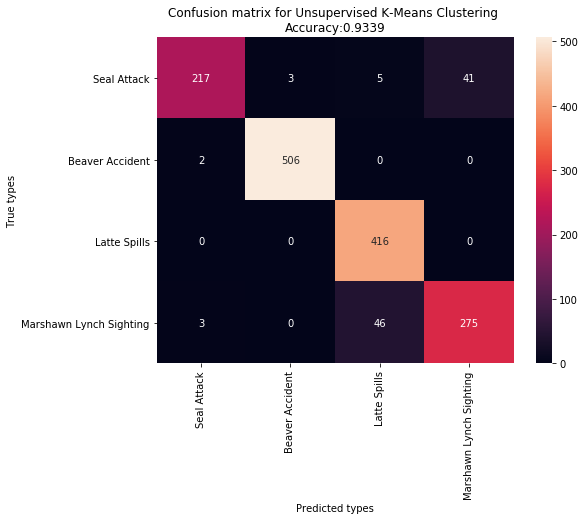

In [56]:
# plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(con_df1, annot=True,fmt='d')

plt.title('Confusion matrix for Unsupervised K-Means Clustering \nAccuracy:{0:.4f}'.format(accuracy_score(data.Type, data.cluster_labels)))
plt.ylabel('True types')
plt.xlabel('Predicted types')
plt.show()

For better intuition of how we have performed as far as geographics is concerned, let us plot the new and old labels on the Seattle base map and see. 

In [57]:
# data.head()

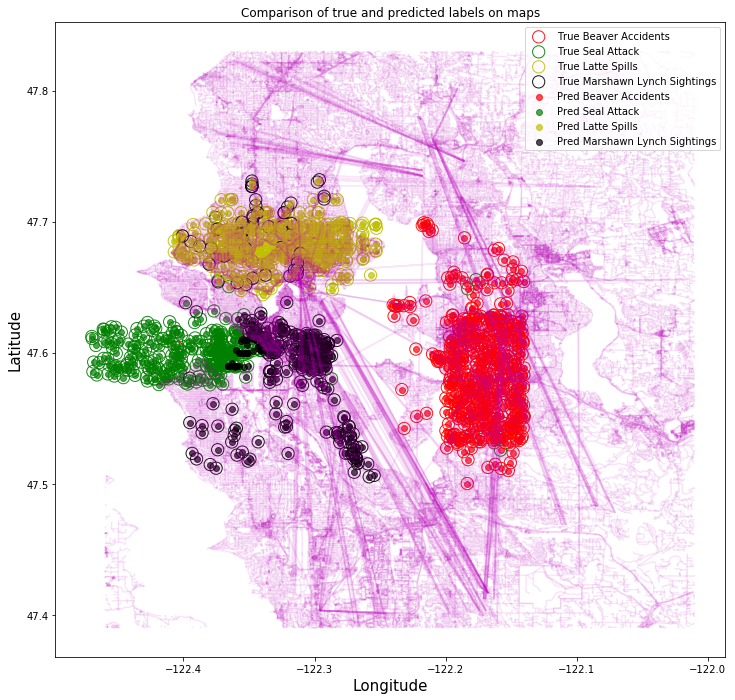

In [58]:
# Let us look at the geographic representation of the predicted points on true data points
#plot result
fig, ax = plt.subplots(figsize = (12,16))
arr = np.array(['b.','r.','m.','g.']);

# x and y labels
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
plt.title("Comparison of true and predicted labels on maps")

# lay down the Seattle base map
roadmap = gpd.read_file("seattle/Seattle-shp/shape/roads.shp")
roadmap.plot(color='m', alpha = 0.1,ax =ax, markersize = 4)

# plotting the outer circles as the true labels as before
data_loc[data.Type == types[0]].geometry.plot(marker='o', color = 'r', ax= ax,label = 'True Beaver Accidents', alpha=.9, markersize = 150, facecolors="none" )
data_loc[data.Type == types[1]].geometry.plot(marker='o', color = 'g', ax= ax,label = 'True Seal Attack', alpha=.9, markersize = 150, facecolors="none")
data_loc[data.Type == types[2]].geometry.plot(marker='o', color = 'y', ax= ax,label = 'True Latte Spills', alpha=.9,markersize = 150, facecolors="none")
data_loc[data.Type == types[3]].geometry.plot(marker='o', color = 'k', ax= ax,label = 'True Marshawn Lynch Sightings', alpha=.9, markersize = 150, facecolors="none" )

data_loc[data.cluster_labels == types[0]].geometry.plot( color = 'r', ax= ax,label = 'Pred Beaver Accidents', alpha=.7 )
data_loc[data.cluster_labels == types[1]].geometry.plot( color = 'g', ax= ax,label = 'Pred Seal Attack', alpha=.7)
data_loc[data.cluster_labels == types[2]].geometry.plot( color = 'y', ax= ax,label = 'Pred Latte Spills', alpha=.7)
data_loc[data.cluster_labels == types[3]].geometry.plot( color = 'k', ax= ax,label = 'Pred Marshawn Lynch Sightings', alpha=.7)


# for i in range(num):
#     cluster=np.where(idlabels==i)[0]
#     plt.plot(locs.Longitude[cluster].values,locs.Latitude[cluster].values,arr[i], alpha = 0.4, markersize = 10, label = "{}".format())

plt.legend(loc = "best");

<a id='second2'></a>

##### Second Approach

In [59]:
#RandomForestClassifier

In [60]:
# dividing x and y labels
X = data[['Latitude','Longitude']].values
y = data['Type']

In [61]:
# assign data randomly into train and test data sets in a (70%, 30%) split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [62]:
# build a the model
randomF = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, warm_start=False)

# I have opted True for oob_score for better interpretation

In [63]:
# train the model
randomF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [64]:
# can be interpreted as the training accuracy
round(randomF.oob_score_ * 100, 2)

95.66

In [65]:
# testing on the 30% dataset
y_pred = randomF.predict(X_test)

In [66]:
# get the confusion matrix
dict2 = {'Seal Attack':'g','Beaver Accident':'r','Latte Spills':'y','Marshawn Lynch Sighting':'k'}

labels2 = list(dict1.keys())
confusion2 = confusion_matrix(y_test, y_pred, labels2)

In [67]:
# heatmap needs dataframe, so this conversion
con_df2 = pd.DataFrame(confusion2,
                     index = labels2, 
                     columns = labels2)

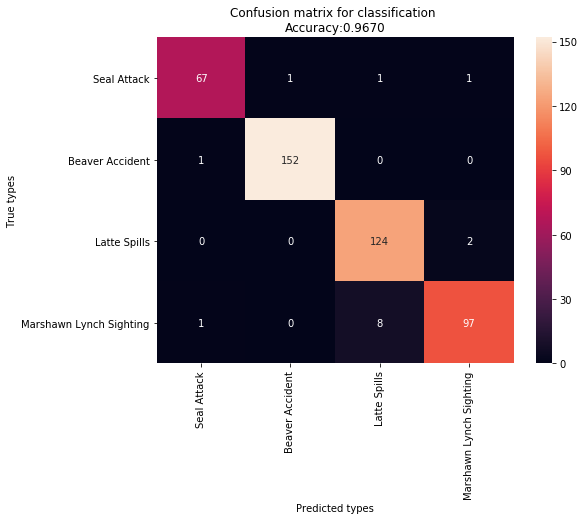

In [68]:
# plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(con_df2, annot=True,fmt='d')

plt.title('Confusion matrix for classification \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True types')
plt.xlabel('Predicted types')
plt.show()

In [69]:
# Again fore better interpretation, we will use plotting

In [70]:
# build a dataframe to add the true and test-predcited values for plotting
rfplot = pd.DataFrame(index = range(len(X_test)) )

In [71]:
rfplot["Latitude"] = X_test[:,0]
rfplot["Longitude"] = X_test[:,1]

y_test = np.array(y_test)
rfplot["True_labels"] = y_test

rfplot["Pred_labels"] = y_pred

In [72]:
# Point for geopandas location metrics
Location = [Point(xy) for xy in zip(rfplot.Longitude, rfplot.Latitude)]

In [73]:
# convert dataframe to geopandas  frame
crs = {'init': 'epsg:4326'}
rfplot = gpd.GeoDataFrame(rfplot, crs=crs, geometry=Location)

In [74]:
rfplot

,Latitude,Longitude,True_labels,Pred_labels,geometry
0,47.665776,-122.378800,Latte Spills,Latte Spills,POINT (-122.3788 47.665776)
1,47.611544,-122.308724,Marshawn Lynch Sighting,Marshawn Lynch Sighting,POINT (-122.3087238 47.61154433)
2,47.601207,-122.309633,Marshawn Lynch Sighting,Marshawn Lynch Sighting,POINT (-122.309633 47.6012065)
3,47.692300,-122.376300,Latte Spills,Latte Spills,POINT (-122.3763 47.6923)
4,47.611094,-122.419621,Seal Attack,Seal Attack,POINT (-122.4196207 47.61109392)
5,47.578100,-122.174700,Beaver Accident,Beaver Accident,POINT (-122.1747 47.5781)
6,47.609300,-122.338900,Marshawn Lynch Sighting,Marshawn Lynch Sighting,POINT (-122.3389 47.6093)
7,47.609300,-122.194400,Beaver Accident,Beaver Accident,POINT (-122.1944 47.6093)
8,47.561600,-122.166900,Beaver Accident,Beaver Accident,POINT (-122.1669 47.5616)
9,47.500200,-122.183500,Beaver Accident,Beaver Accident,POINT (-122.1835 47.5002)


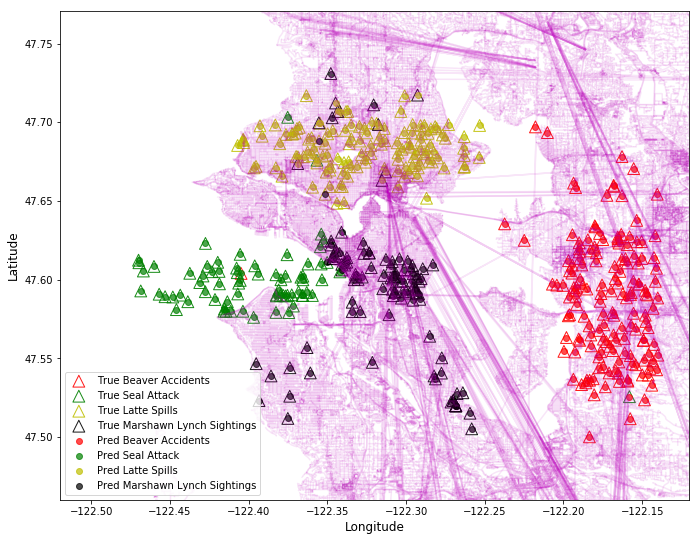

In [75]:
#plot result
fig, ax = plt.subplots(figsize = (16,9))

plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)

roadmap = gpd.read_file("seattle/Seattle-shp/shape/roads.shp")
roadmap.plot(color='m', alpha = 0.1,ax =ax, markersize = 4)

rfplot[rfplot.True_labels == types[0]].geometry.plot(marker='^', color = 'r', ax= ax,label = 'True Beaver Accidents', alpha=.9, markersize = 140, facecolors="none" )
rfplot[rfplot.True_labels == types[1]].geometry.plot(marker='^', color = 'g', ax= ax,label = 'True Seal Attack', alpha=.9, markersize = 140, facecolors="none")
rfplot[rfplot.True_labels == types[2]].geometry.plot(marker='^', color = 'y', ax= ax,label = 'True Latte Spills', alpha=.9,markersize = 140, facecolors="none")
rfplot[rfplot.True_labels == types[3]].geometry.plot(marker='^', color = 'k', ax= ax,label = 'True Marshawn Lynch Sightings', alpha=.9, markersize = 140, facecolors="none" )

rfplot[rfplot.Pred_labels == types[0]].geometry.plot( color = 'r', ax= ax,label = 'Pred Beaver Accidents', alpha=.7 )
rfplot[rfplot.Pred_labels == types[1]].geometry.plot( color = 'g', ax= ax,label = 'Pred Seal Attack', alpha=.7)
rfplot[rfplot.Pred_labels == types[2]].geometry.plot( color = 'y', ax= ax,label = 'Pred Latte Spills', alpha=.7)
rfplot[rfplot.Pred_labels == types[3]].geometry.plot( color = 'k', ax= ax,label = 'Pred Marshawn Lynch Sightings', alpha=.7)

plt.xlim(rfplot.Longitude.min()-0.05, rfplot.Longitude.max()+0.02)
plt.ylim(rfplot.Latitude.min()-0.04, rfplot.Latitude.max()+0.04)
plt.legend(loc = "lower left")

#### Told you! Random Forest always performs. It is like a trump card. 

<a id='correct'></a>

#### Q3.D - Please display the number of correct categorizations


##### Approach 1 

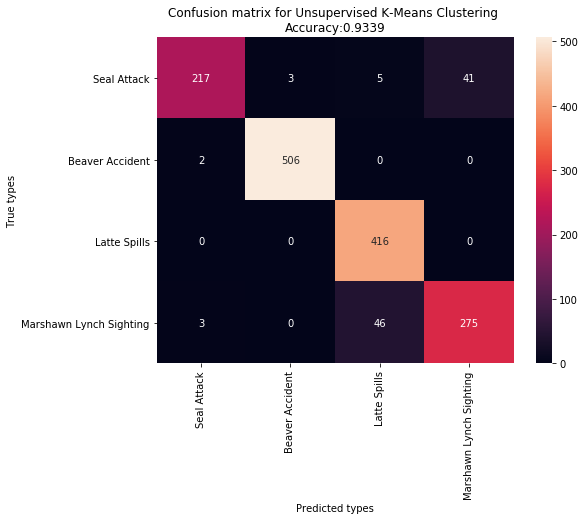

In [76]:
# plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(con_df1, annot=True,fmt='d')

plt.title('Confusion matrix for Unsupervised K-Means Clustering \nAccuracy:{0:.4f}'.format(accuracy_score(data.Type, data.cluster_labels)))
plt.ylabel('True types')
plt.xlabel('Predicted types')
plt.show()

##### Approach 2

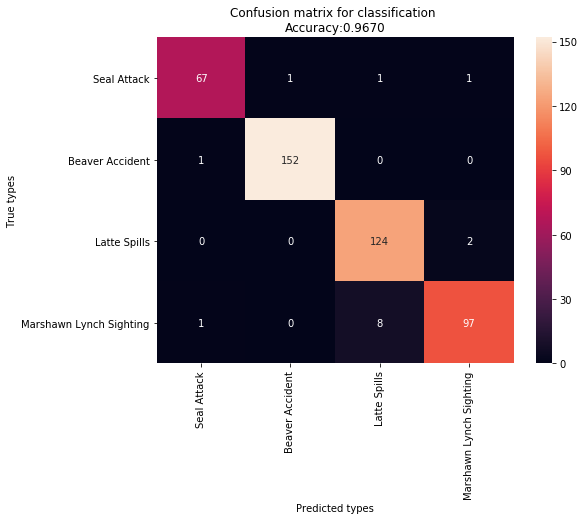

In [77]:
# lets us plot the confusion matrix again

plt.figure(figsize=(8,6))
sns.heatmap(con_df2, annot=True,fmt='d')

plt.title('Confusion matrix for classification \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True types')
plt.xlabel('Predicted types')
plt.show()

<a id='insights'></a>

#### Q3.E What insight can we extract from this analysis?

I would like to divide the insights into two parts. One will be based on actual data inferences and the other will be based on prediction insights

##### Inferences from Actual data

1. Latte Spills - Latte Spills is distributed on the North side of Seattle. This can be interpreted as the students who are in University of Washington or the ones who live nearby who go to college, are the ones most prone to Latte Spills.  

2. Marhsawn Lynch Sighting (MLS) - First of all, no one ever calls 911 when they see their favorite football player (kidding). Jokes apart, I think this dataset must be in the span of 2010-2015, as this is the time when Lynch used to play with Seattle Seahawks (Yes, I did some homework). In 2013, he won SuperBowl with Seahawks, making him most popular around the area. This shows the trajectory of this football player around Seattle. 

3. Seal Attacks - Seal Attacks are pretty much predictable through naked eyes because they are clustered in the shore areas. However, we see the 2 or 3 seal attacks inside the city in Bellevue which can be treated as outliers. 

4. Beaer Accidents - Beaver Accidents are solely concentrated on Bellevue side. They are known as "Urban Troublemaker". 


##### Inferences from Prediction

1. Even if we come up with nueral nets, the MLS data points can never be correctly classified.They might get mis-classified into Seal attacks or Latte Spills due to their location. 

2. We talked about the outlier of Seal attack in Bellevue. Apart from that, the best classified class is Beaver Accident. 


<a id='extra'></a>

### Extra 

[Back to index](#new)

<a id='future'></a>

#### Future Work 


As we concluded that Eucledian distance is not the right way to calculate the distances using latitudes and longitudes, we can use the **"haversine distance"**. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

The library **"hdbscan"** can be used to compute the same and predict the unsupervised clusters. I have tried installing but when i forge it to install, my environment messess up. So, I am leaving it upto future work. 

In [78]:
!pip install hdbscan

  Using cached https://files.pythonhosted.org/packages/22/8d/1fc4bfd17ae871441fd6440abc3da5fdecf34831aa711e3e52727ab00556/hdbscan-0.8.19.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/14/48/43fd6c0b29450c57a4eff636384dd691bef05c49410edfeb2fe4e4e79ec2/Cython-0.29.6-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/d1/6c/6ddb21e203ff95d7080aeee2105b4f6610a02483e00d4ac950f3630969c9/scikit_learn-0.20.2-cp37-cp37m-win_amd64.whl
  Complete output from command c:\users\raghu\anaconda3\envs\test_python2\python.exe c:\users\raghu\anaconda3\envs\test_python2\lib\site-packages\pip\_vendor\pep517\_in_process.py build_wheel C:\Users\raghu\AppData\L

  Failed building wheel for hdbscan
Could not build wheels for hdbscan which use PEP 517 and cannot be installed directly


In [79]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

<a id='betterp'></a>

#### Better Predictions 

For better predictions, one should focus on increasing the population to atleast 10K for better training and testing results. 